# Online Retail II – Sales Analysis

This notebook analyzes the Online Retail II dataset to understand sales performance,  
customer behavior, and top-selling products. Analysis is done using Python (Pandas, Matplotlib).


In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- 3. Učitavanje dataset-a ----
df = pd.read_excel("../Datasets/online_retail_II.xlsx")
df.head()



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [51]:
df.isnull().sum()


Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

The dataset contains 525,461 entries and 8 columns. Here's a quick overview of missing values:

- **Description:** 2,928 missing entries (~0.56%)  
- **Customer ID:** 107,927 missing entries (~20.5%)  
- **Other columns:** Complete, no missing values  

> Note: Missing Customer IDs are not filled, as this analysis focuses on overall sales trends and top products.

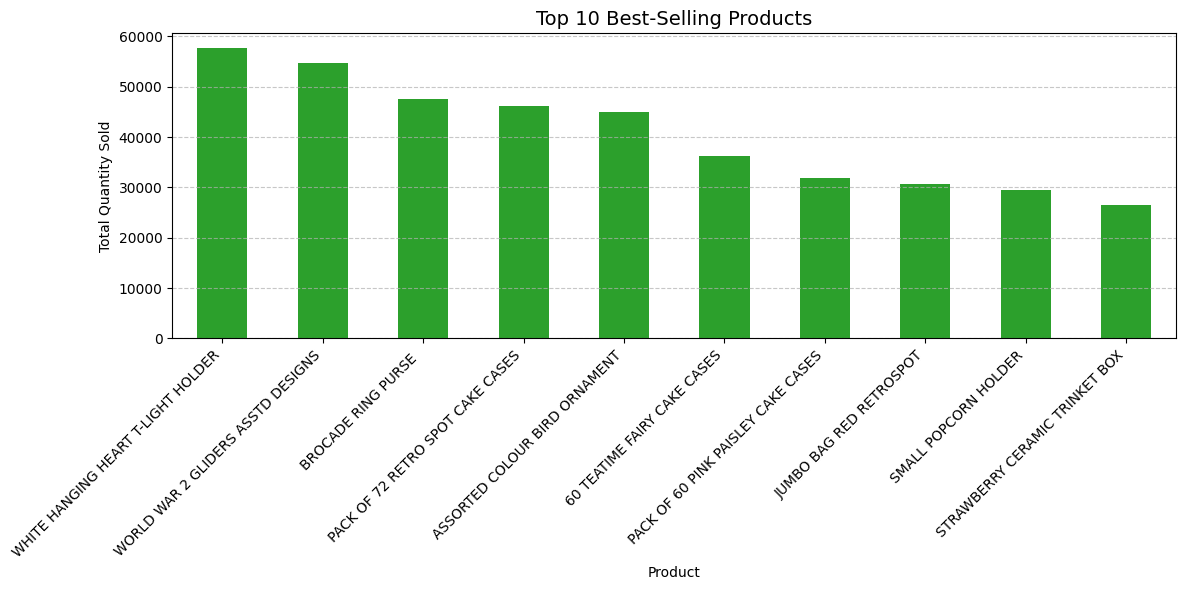

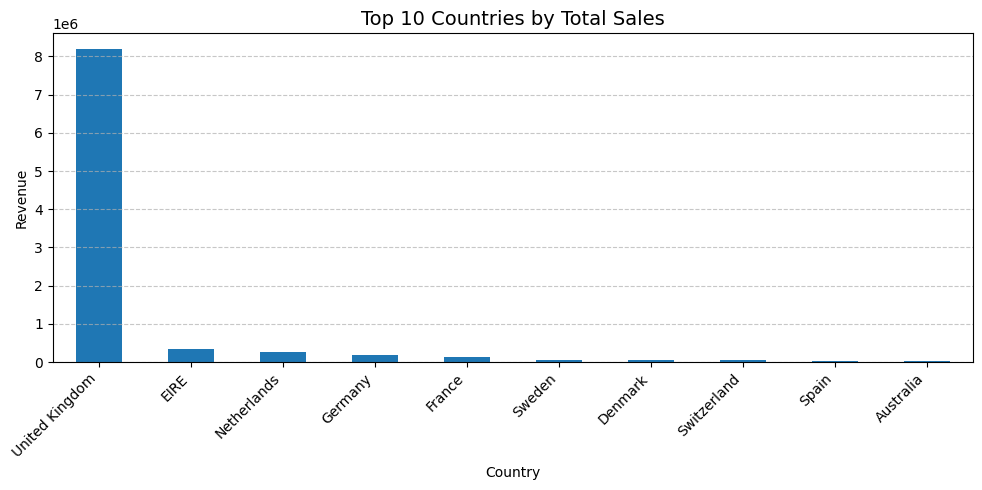

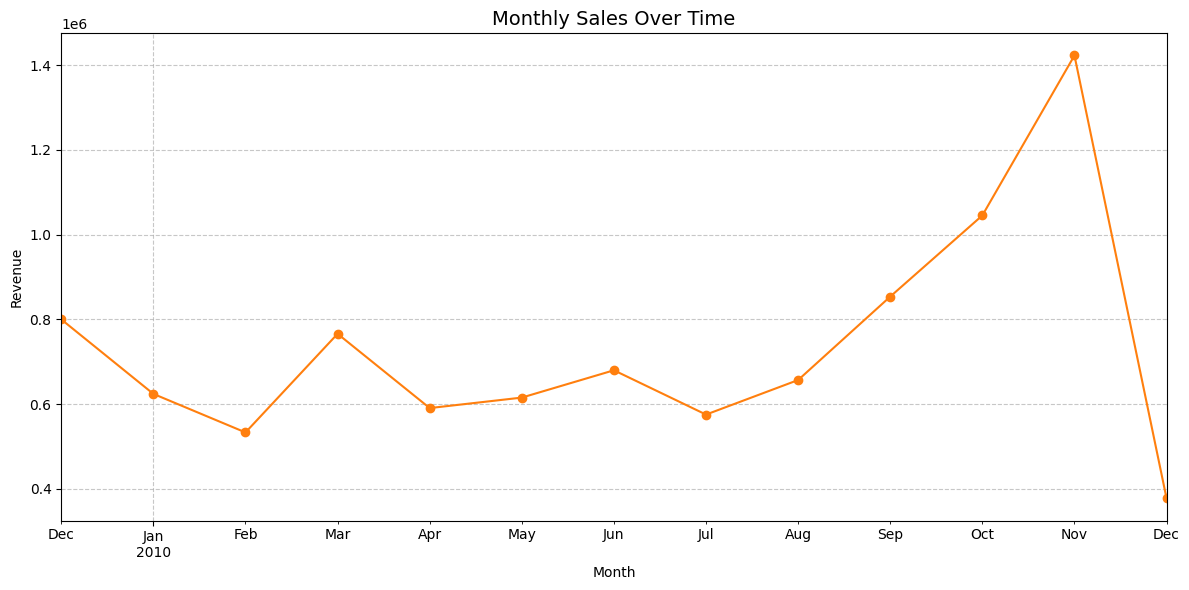

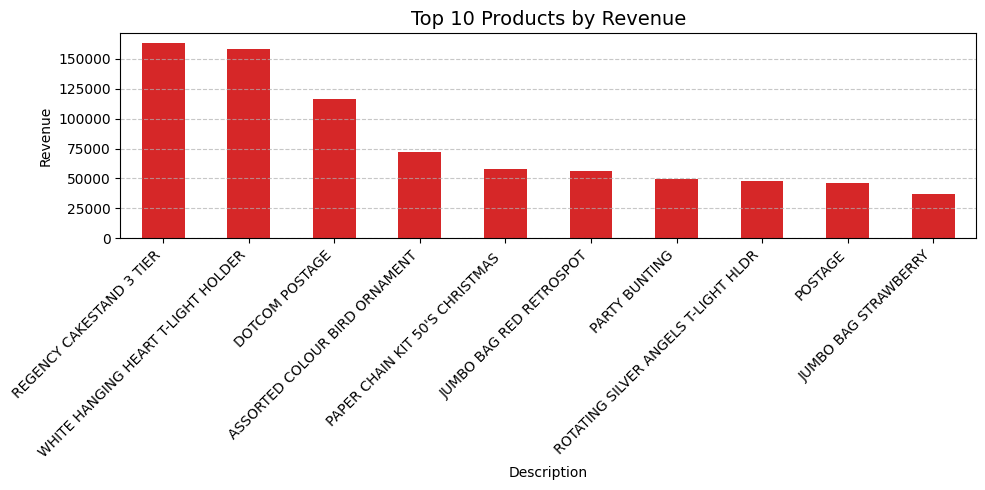

In [52]:
# ---- 5. Analiza top proizvoda po količini ----
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
top_products.plot(kind="bar", color="#2ca02c")  # profesionalna boja
plt.title("Top 10 Best-Selling Products", fontsize=14)
plt.xlabel("Product")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# ---- 6. Analiza prihoda po zemlji ----
df["TotalPrice"] = df["Quantity"] * df["Price"]
sales_country = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sales_country.plot(kind="bar", color="#1f77b4")
plt.title("Top 10 Countries by Total Sales", fontsize=14)
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# ---- 7. Trend mesečnih prihoda ----
df["Month"] = df["InvoiceDate"].dt.to_period("M")
monthly_sales = df.groupby("Month")["TotalPrice"].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind="line", marker="o", color="#ff7f0e")
plt.title("Monthly Sales Over Time", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# ---- 8. Top proizvodi po prihodu ----
top_revenue_products = df.groupby("Description")["TotalPrice"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_revenue_products.plot(kind="bar", color="#d62728")
plt.title("Top 10 Products by Revenue", fontsize=14)
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


## Summary of Analysis

**Best-selling products by revenue:**
- Regency Cakestand 3 Tier: $163,051  
- White Hanging Heart T-Light Holder: $157,865  
- Dotcom Postage: $116,401  

**Products with highest quantities sold:**
- White Hanging Heart T-Light Holder: 57,733 units  
- World War 2 Gliders Assorted Designs: 54,698 units  

**Monthly sales trend:**
- Peak revenue: Nov 2010 ($1,422,654), Oct 2010 ($1,045,168)  
- Lowest revenue: Dec 2010 ($377,488)  
- Clear seasonal variation with holiday peaks.  

**Metric used:** TotalPrice = Quantity * Price
